In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

from sklearn.metrics import r2_score

In [4]:
bikes = pd.read_csv("BikeSharing/day.csv")
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
bikes.shape

(730, 16)

The Dataset contains 730 rows and 16 columns of data.

In [6]:
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


All are numerical datatypes except the dteday.

In [8]:
bikes.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

The dataset does not have any null values.

In [9]:
# renaming few columns for better readibility

bikes.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [10]:
bikes.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [11]:
bikes_copy = bikes.copy()

In [12]:
bikes_copy.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [13]:
# dropping the unwanted columns
# instant has only index for the row, dteday has date which can be compensated by year and month column,
# casual and registered seems to be the breakup by category for cnt column.

bikes.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [14]:
# Encoding/mapping the season column

bikes.season = bikes.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [15]:
# Encoding/mapping the month column

bikes.month = bikes.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [16]:
# Encoding/mapping the weathersit column

bikes.weathersit = bikes.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [17]:
bikes.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,6,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,0,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### Visualizing the data

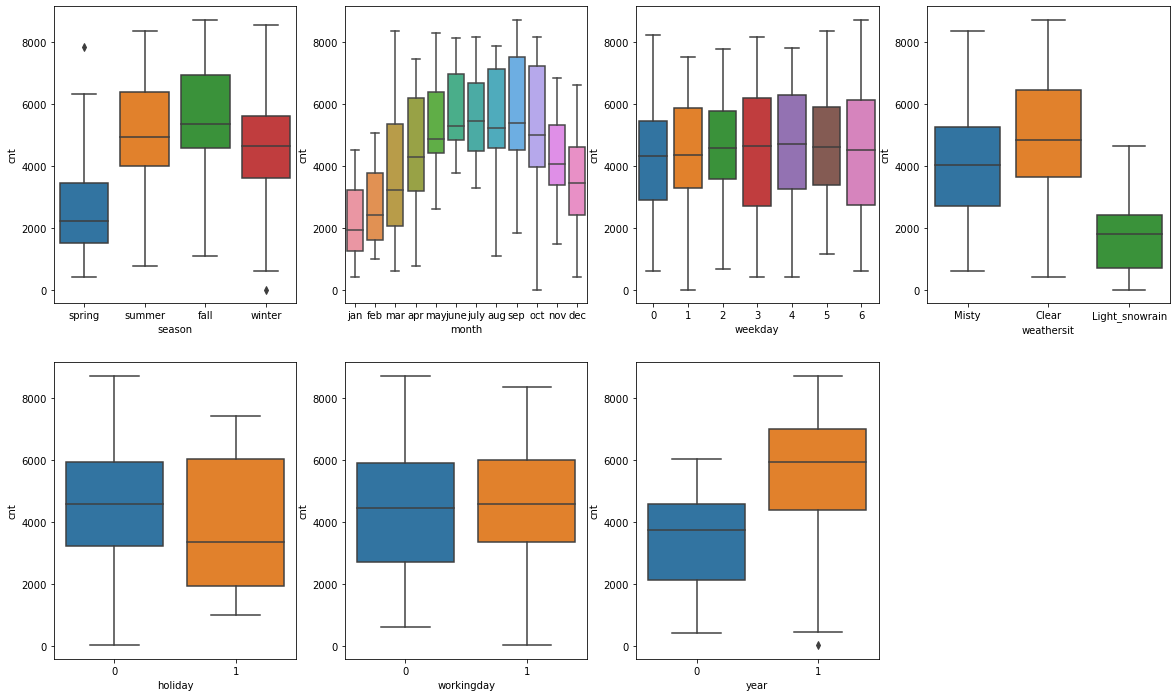

In [18]:
# Visualizing the categorical columns to see how predictor variable stands against the target variable

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikes)
plt.subplot(2,4,2)
sns.boxplot(x = 'month', y = 'cnt', data = bikes)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikes)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikes)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikes)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikes)
plt.subplot(2,4,7)
sns.boxplot(x = 'year', y = 'cnt', data = bikes)
plt.show()

In [19]:
# function to create barplot related to categorical columns

def plot_cat_columns(column):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(column,'cnt',data=bikes)
    plt.subplot(1,2,2)
    sns.barplot(column,'cnt',data=bikes, hue='year',palette='Set2')
    plt.legend(labels=['2018', '2019'])
    plt.show()

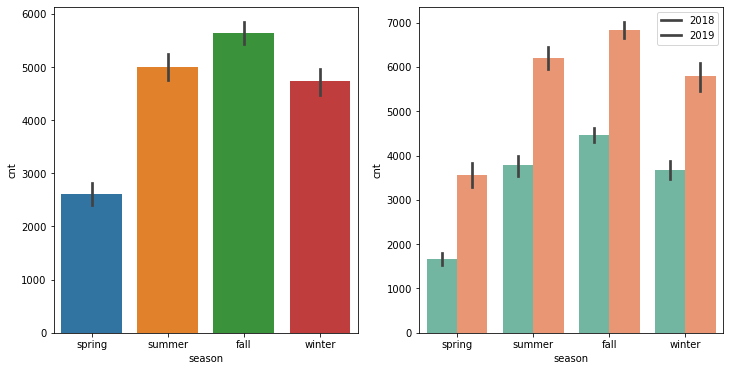

In [20]:
plot_cat_columns('season')

The fall seasons attracts more customers than any other season and there is a increase in the count from year 2018 to 2019.

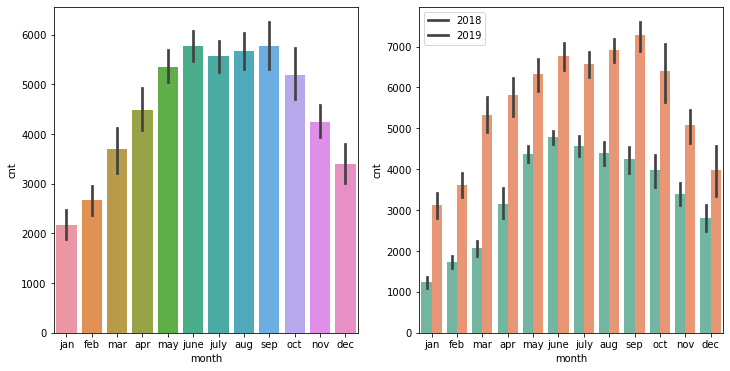

In [21]:
plot_cat_columns('month')

From the graph, it appears that mid of year has more count than the starting or ending of the year which might be also due to the weather.

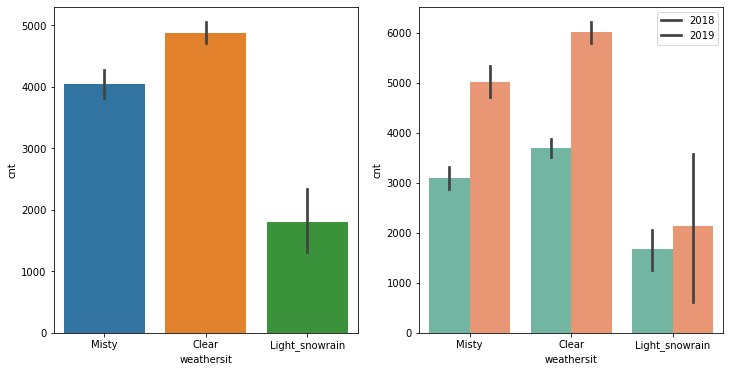

In [22]:
plot_cat_columns('weathersit')

Clear weather attracted more booking which seems obvious. And in comparison to previous year, i.e 2018, booking increased for each weather situation in 2019.

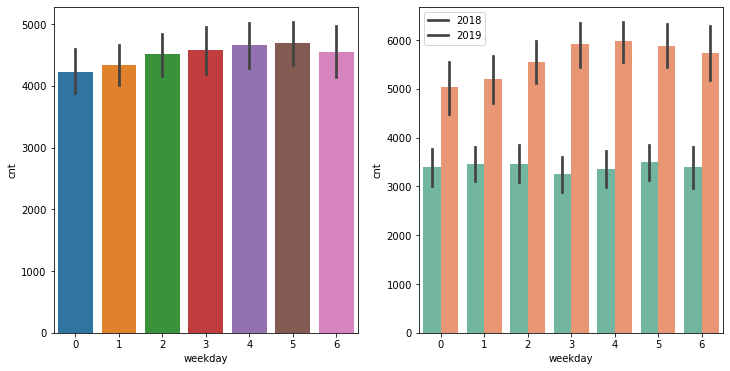

In [23]:
# plotting visualization for weekday column

plot_cat_columns('weekday')

The number of bookings have comparitively increased from 2018 to 2019.

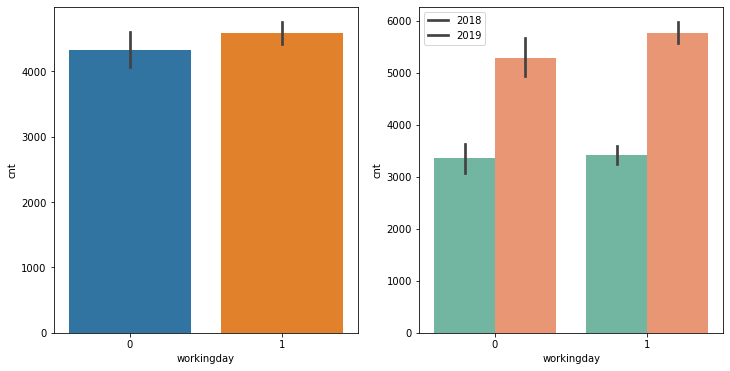

In [24]:
# plotting visualization for workingday column

plot_cat_columns('workingday')

Booking seemed to be almost equal either on working day or non-working day. But, the count increased from 2018 to 2019.

### Visualizing the numerical columns

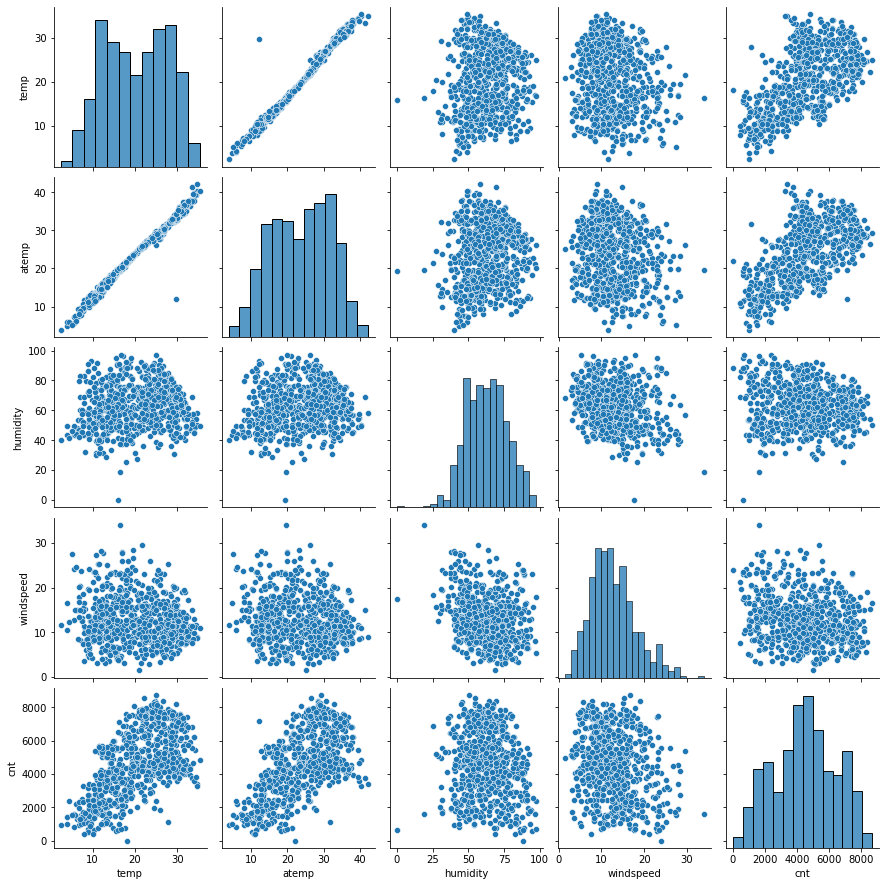

In [25]:
sns.pairplot(data=bikes,vars=['temp','atemp','humidity','windspeed','cnt'])
plt.show()

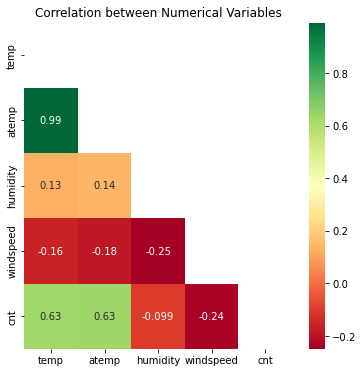

In [26]:
plt.figure(figsize = (6,6))
matrix = np.triu(bikes[['temp','atemp','humidity','windspeed','cnt']].corr())
sns.heatmap(bikes[['temp','atemp','humidity','windspeed','cnt']].corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.title("Correlation between Numerical Variables")
plt.show()

There is a strong linear relationship between the variables atemp and temp, in which case we cannot use both the variables in the model building due to multicolinearity. We will decide which parameter to keep based on VIF and p-value.

### Data Preparation

In [27]:
# Dummy variable creation for month, weekday, weathersit and season variables.

months_df=pd.get_dummies(bikes.month,drop_first=True)
weekdays_df=pd.get_dummies(bikes.weekday,drop_first=True)
weathersit_df=pd.get_dummies(bikes.weathersit,drop_first=True)
seasons_df=pd.get_dummies(bikes.season,drop_first=True)

In [28]:
# Merging  the dataframe, with the dummy variable dataset. 

bikes_new = pd.concat([bikes,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

In [29]:
bikes_new.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,2,3,4,5,6,Light_snowrain,Misty,spring,summer,winter
0,spring,0,jan,0,6,0,Misty,14.110847,18.18125,80.5833,...,0,0,0,0,1,0,1,1,0,0
1,spring,0,jan,0,0,0,Misty,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,1,0,0
2,spring,0,jan,0,1,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,2,1,Clear,8.200000,10.60610,59.0435,...,1,0,0,0,0,0,0,1,0,0
4,spring,0,jan,0,3,1,Clear,9.305237,11.46350,43.6957,...,0,1,0,0,0,0,0,1,0,0


In [30]:
# dropping unnecessary columns as we have already created dummy variable out of it.

bikes_new.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

In [31]:
bikes_new.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,2,3,4,5,6,Light_snowrain,Misty,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,1,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,1,0,0,0,0,0,1,0,0


In [32]:
bikes_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   humidity        730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   aug             730 non-null    uint8  
 9   dec             730 non-null    uint8  
 10  feb             730 non-null    uint8  
 11  jan             730 non-null    uint8  
 12  july            730 non-null    uint8  
 13  june            730 non-null    uint8  
 14  mar             730 non-null    uint8  
 15  may             730 non-null    uint8  
 16  nov             730 non-null    uint8  
 17  oct             730 non-null    uin

### Splitting the data into training and test sets

In [33]:
b_train, b_test = train_test_split(bikes_new, train_size = 0.7, random_state = 100)

In [36]:
b_train.shape

(510, 30)

In [35]:
b_test.shape

(220, 30)

In [37]:
scaler = MinMaxScaler()

In [38]:
b_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,2,3,4,5,6,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,1,0,0,0,0,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,0,0,0,0,1,0,1,1,0,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,1,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,0,...,0,0,0,0,1,0,1,0,1,0
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,0,0,...,0,0,0,1,0,0,1,0,1,0


In [39]:
num_vars = ['temp','atemp','humidity','windspeed','cnt']
b_train[num_vars] = scaler.fit_transform(b_train[num_vars])

In [40]:
# After Scaling
b_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,2,3,4,5,6,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,1,0,0,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,1,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,0,0,0,0,1,0,1,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,0,0,1,0,0,1,0,1,0


In [41]:
b_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,2,3,4,5,6,Light_snowrain,Misty,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,...,0.131373,0.158824,0.133333,0.127451,0.154902,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,...,0.338139,0.365870,0.340268,0.333805,0.362166,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


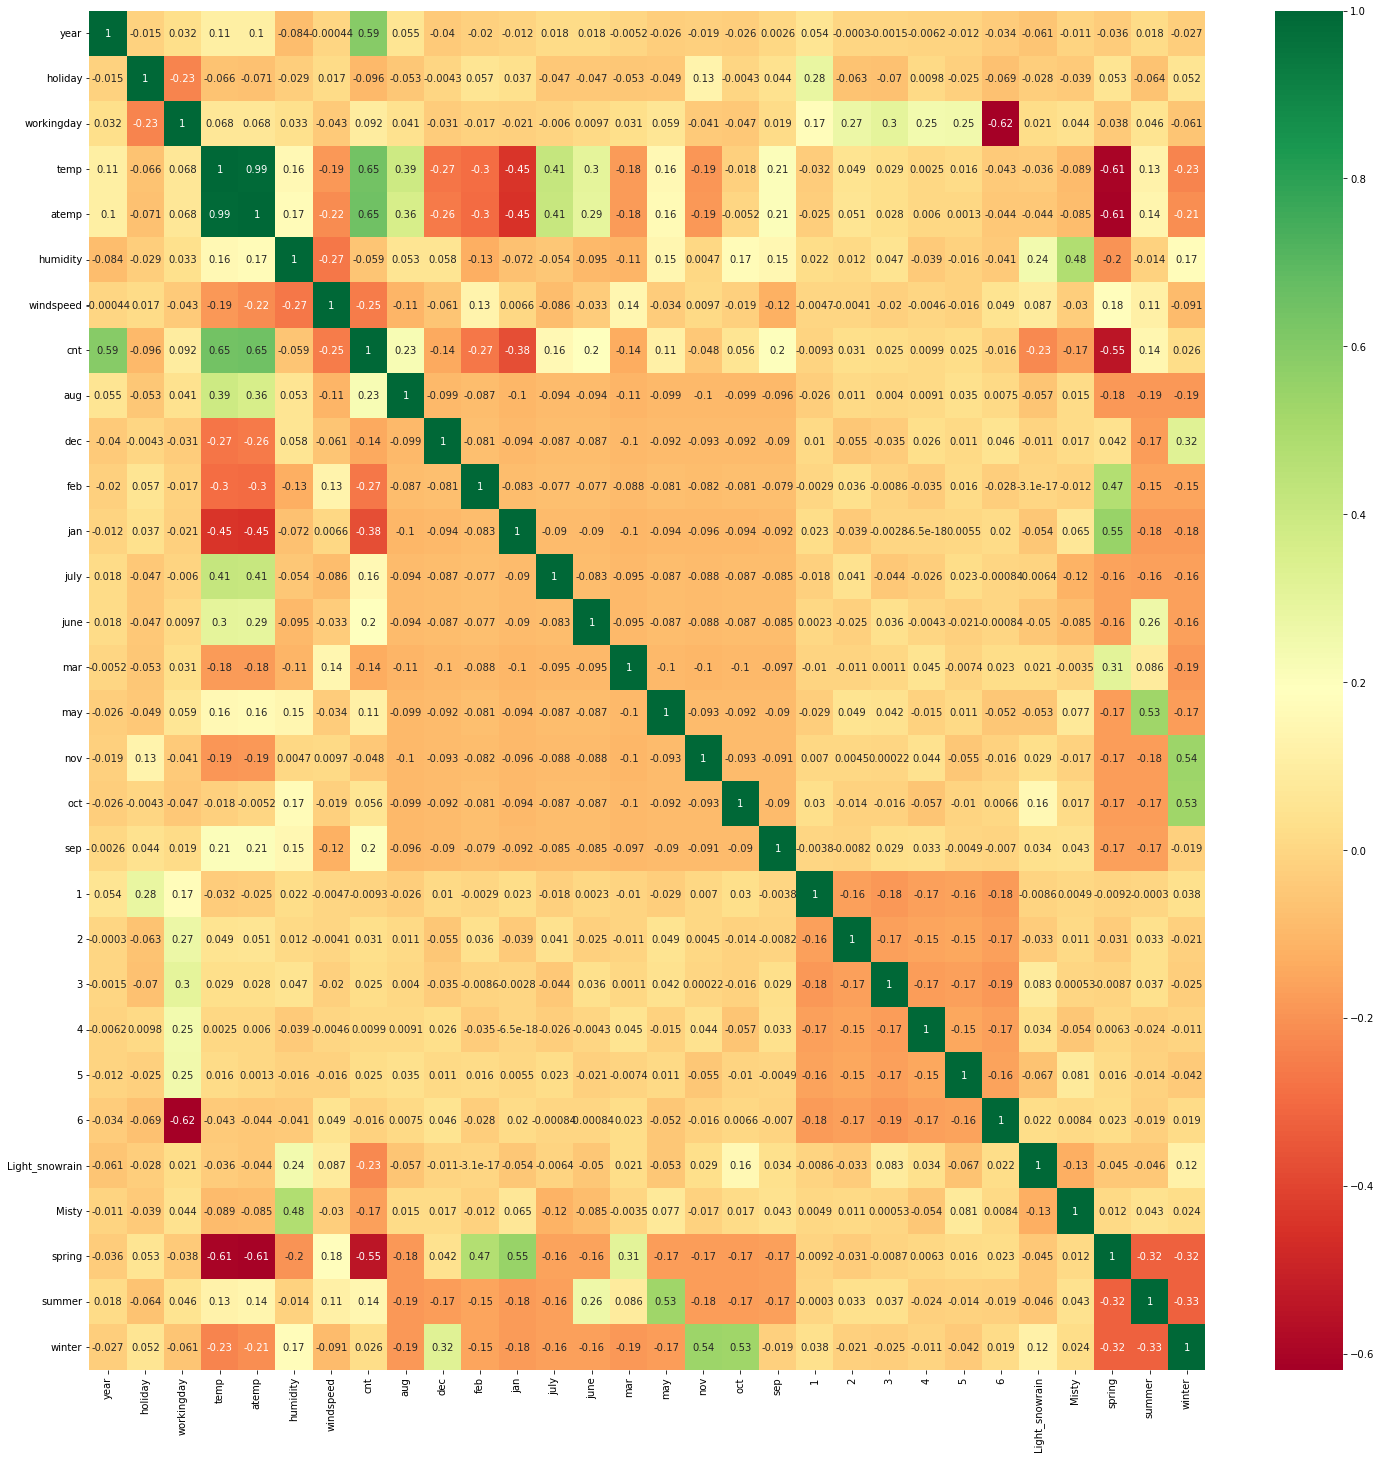

In [43]:
plt.figure(figsize = (25,25))
sns.heatmap(b_train.corr(), annot = True, cmap="RdYlGn")
plt.show()

The following are the correleations :
cnt seems to have correlation with year variable and temp. 
Misty and humidity show correlation. 
Spring season with Jan and Feb month shows correleatio0n.
Summer season with may month and Winter season with oct and nov month show good correlation.

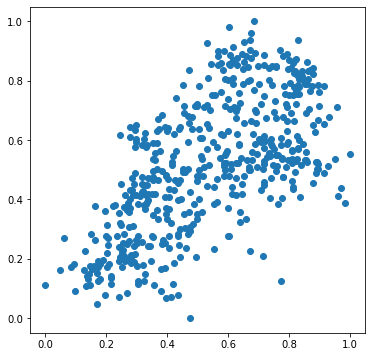

In [44]:
plt.figure(figsize=[6,6])
plt.scatter(b_train.temp, b_train.cnt)
plt.show()

In [45]:
# Building the linear regression model

y_train = b_train.pop('cnt')
X_train = b_train

In [51]:
# Recursive feature elimination 

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [52]:
#List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 7),
 ('dec', False, 3),
 ('feb', False, 4),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 12),
 ('mar', False, 15),
 ('may', False, 6),
 ('nov', False, 2),
 ('oct', False, 11),
 ('sep', True, 1),
 (1, False, 8),
 (2, False, 9),
 (3, False, 13),
 (4, False, 14),
 (5, False, 10),
 (6, True, 1),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [53]:
# selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
print(col)

Index([          'year',        'holiday',     'workingday',           'temp',
             'humidity',      'windspeed',            'jan',           'july',
                  'sep',                6, 'Light_snowrain',          'Misty',
               'spring',         'summer',         'winter'],
      dtype='object')


In [54]:
X_train.columns[~rfe.support_]

# To check which columns are rejected

Index(['atemp', 'aug', 'dec', 'feb', 'june', 'mar', 'may', 'nov', 'oct', 1, 2,
       3, 4, 5],
      dtype='object')

In [55]:
# Generic function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [56]:
X_train_rfe = X_train[col]

In [57]:
calculateVIF(X_train_rfe)

,Features,VIF
4,humidity,29.37
3,temp,17.78
2,workingday,5.31
5,windspeed,4.73
12,spring,4.53
14,winter,3.46
13,summer,2.85
11,Misty,2.29
0,year,2.09
9,6,1.98


### Building Linear Regression models

In [58]:
# Building 1st linear regression model

X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          4.22e-191
Time:                        12:02:00   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2519      0.036      6.

In [59]:
# As humidity shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['humidity'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.68
11,spring,3.07
12,summer,2.34
0,year,2.08
13,winter,1.98
8,6,1.97
5,jan,1.62
6,july,1.59


In [60]:
# Building 2nd linear regression model

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          1.60e-188
Time:                        12:02:36   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1737      0.031      5.

In [62]:
# We can drop jan variable as it has high p-value
X_train_new = X_train_new.drop(['jan'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,temp,6.97
2,workingday,5.20
4,windspeed,4.65
10,spring,2.49
11,summer,2.34
0,year,2.07
12,winter,1.98
7,6,1.96
5,july,1.58
9,Misty,1.57


In [63]:
# Building 3rd linear regression model

X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          1.28e-188
Time:                        12:05:30   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1576      0.031      5.

In [64]:
# We can drop july variable
X_train_new = X_train_new.drop(['july'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,temp,5.70
2,workingday,5.20
4,windspeed,4.65
9,spring,2.40
0,year,2.07
10,summer,2.01
6,6,1.96
11,winter,1.83
8,Misty,1.57
5,sep,1.24


In [66]:
# We can drop july variable
X_train_new = X_train_new.drop([6], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,temp,4.72
4,windspeed,4.60
2,workingday,3.17
8,spring,2.16
0,year,2.07
9,summer,1.96
10,winter,1.70
7,Misty,1.56
5,sep,1.23
1,holiday,1.09


In [67]:
# VIF values are below 5, hence building the next regression model
# Building 4rth linear regression model

X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     227.2
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          4.17e-186
Time:                        12:08:21   Log-Likelihood:                 496.63
No. Observations:                 510   AIC:                            -969.3
Df Residuals:                     498   BIC:                            -918.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1794      0.030      5.

We can cosider the above model i.e lr_4, as it seems to have very low multicolinearity between the predictors and the p-values for all the predictors seems to be good.

In [69]:
# Checking the parameters and their coefficient values
lr_4.params

const             0.179419
year              0.233721
holiday          -0.084989
workingday        0.016926
temp              0.476782
windspeed        -0.146331
sep               0.090500
Light_snowrain   -0.286482
Misty            -0.079407
spring           -0.055272
summer            0.061760
winter            0.095326
dtype: float64

### Residual Analysis of the training data

In [70]:
X_train_lm_4

,const,year,holiday,workingday,temp,windspeed,sep,Light_snowrain,Misty,spring,summer,winter
576,1.0,1,0,1,0.815169,0.264686,0,0,0,0,0,0
426,1.0,1,0,0,0.442393,0.255342,0,0,1,1,0,0
728,1.0,1,0,0,0.245101,0.663106,0,0,0,1,0,0
482,1.0,1,0,0,0.395666,0.188475,0,0,1,0,1,0
111,1.0,0,0,1,0.345824,0.380981,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,1,0.863973,0.187140,0,0,0,0,0,0
53,1.0,0,0,1,0.202618,0.111379,0,0,0,1,0,0
350,1.0,0,0,0,0.248216,0.431816,0,0,1,0,0,1
79,1.0,0,0,1,0.462664,0.529881,0,0,1,0,1,0


In [71]:
y_train_pred = lr_4.predict(X_train_lm_4)

Text(0.5, 0, 'Errors')

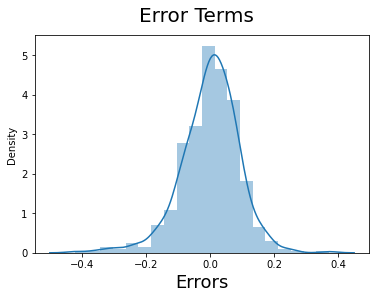

In [72]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

In [73]:
calculateVIF(X_train_new)

,Features,VIF
3,temp,4.72
4,windspeed,4.60
2,workingday,3.17
8,spring,2.16
0,year,2.07
9,summer,1.96
10,winter,1.70
7,Misty,1.56
5,sep,1.23
1,holiday,1.09


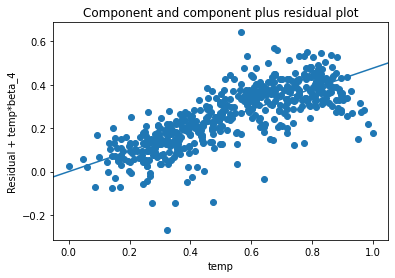

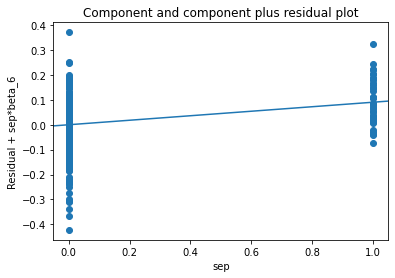

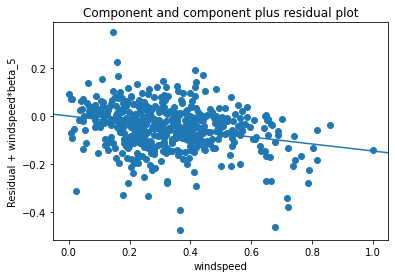

In [75]:
sm.graphics.plot_ccpr(lr_4, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr_4, 'sep')
plt.show()

sm.graphics.plot_ccpr(lr_4, 'windspeed')
plt.show()

### Making predictions using final model

In [76]:
# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'humidity', 'windspeed','cnt']
b_test[num_vars] = scaler.transform(b_test[num_vars])
b_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,2,3,4,5,6,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,1,0,0,0,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,1,0,0,0,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,1,0,0,0,0,0,1,0


In [78]:
y_test = b_test.pop('cnt')
X_test = b_test

In [79]:
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_4 = sm.add_constant(X_test)

In [80]:
y_pred = lr_4.predict(X_test_lm_4)

In [81]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.8047

### Model Evaluation

Text(0, 0.5, 'y_pred')

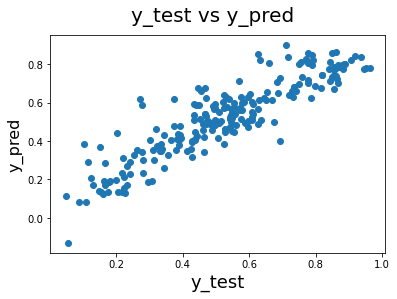

In [82]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [83]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7943


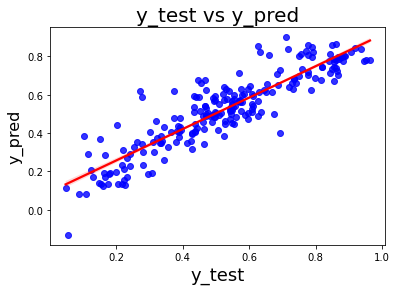

In [84]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

- R2 of train dataset : 0.834
- R2 of test dataset : 0.8047
- Adjusted R2 of train dataset : 0.830
- Adjusted R2 of test dataset : 0.7943

Demand of bikes depends on year, holiday, temperature, wind_speed, misty, Light_snowrain, spring, summer and winter.